# UK used car data analysis
##### By Pradeep Gurunathan

## Investigation Overview

> Main focus of this report is based on the United Kingdom's Used car data collected from 1970 to 2020 nearly 100,000 car details. Data set consists of price, transmission, mileage, fuel type, road tax, miles per gallon (mpg), and engine size information. These used car consists of various brand such as Audi, VW, Skoda, BMW, etc. 
>
> Report focuses on the trends seen over the years for the used car market in UK and also get to know type of cars that are sold by the customer the most.

## Dataset Overview

> This document explores the United kingdom's 100k Used car data containing cars details collected from 1970 to 2020.
>
>Source for this analysis the data can be found in kaggle [here](https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes).
>
>Individual dataset is downloaded and mergered to for a single dataset for data cleaning and then used for data visualization

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import glob 
import os

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
# load in the dataset into a pandas dataframe
used_cars_master=pd.read_csv('used_cars_master.csv')

## How is the UK's used car trend based on the car manufacturing year?

> As per the bar plot it is evident that cars with 2019 manufacturing year is listed highest in the UK's used car market. Cars with manufacturing year less than 2013 is very less compare to other years.

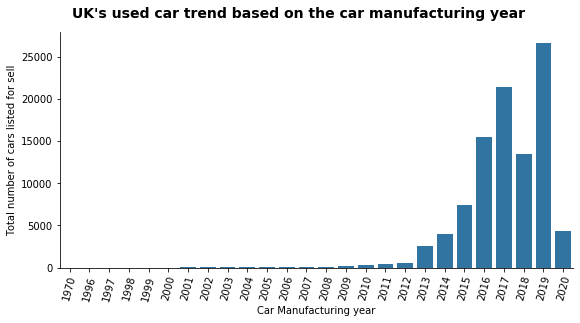

In [4]:
base_color = sns.color_palette()[0]
g = sns.catplot(data=used_cars_master,x='year',kind='count',color=base_color,height=4, aspect=8/4)
g.set_axis_labels('Car Manufacturing year','Total number of cars listed for sell')
g.fig.suptitle("UK's used car trend based on the car manufacturing year",y=1.05,fontsize=14,fontweight='bold')
g.set_xticklabels(rotation=75);

## How is the UK's used car trend based on the car's Age?

> Based on the histogram mean UK car's age is 4 and majority of the cars are two year old that are listed in UK's used car markrt.

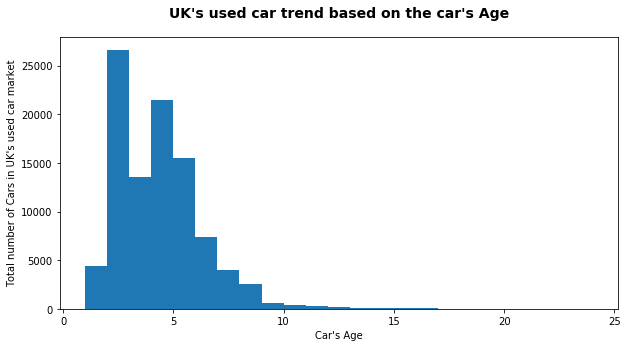

In [5]:
bin_edges = np.arange(1,25,1)
plt.figure(figsize=(10,5))
plt.hist(data=used_cars_master,x='CarAge',bins=bin_edges)
plt.title("UK's used car trend based on the car's Age", y=1.05, fontsize=14, fontweight='bold')
plt.xlabel("Car's Age")
plt.ylabel("Total number of Cars in UK's used car market");

## How is the UK's used car trend based on the car's Fuel type and mpg?

> Petrol cars with less than 60 mpg are listed more compare to cars more than 60 mpg. Incontrast diesel cars with less than 60 mpg are listed less compare to cars more than 60 mpg. More than 50,000 petrol cars are listed in UK's used car market compared to other fuel type cars.

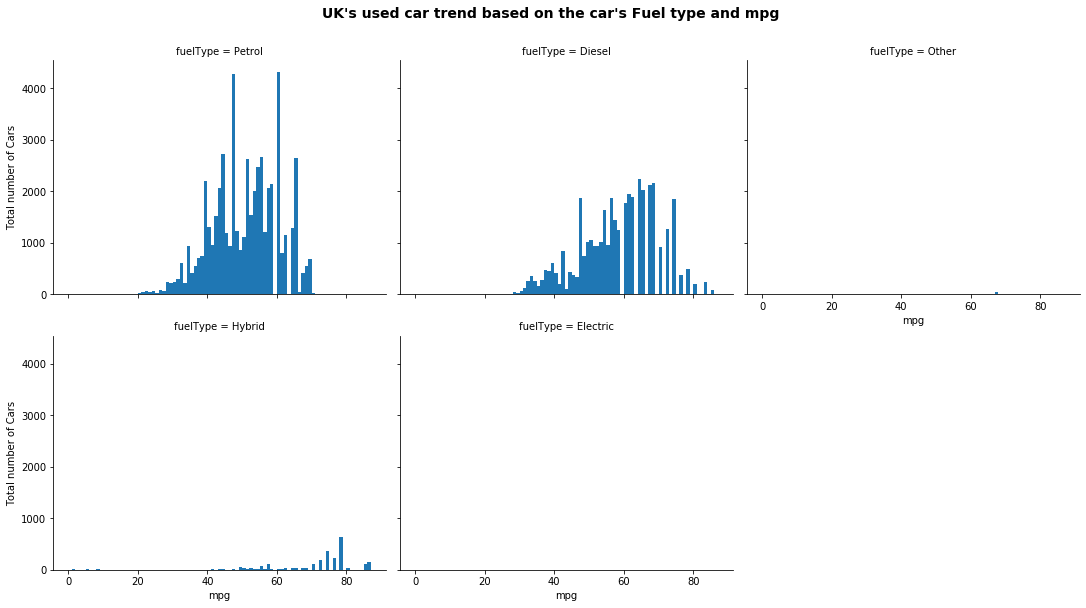

In [6]:
bins = np.arange(0,86+2,1)
g = sns.FacetGrid(data=used_cars_master,col='fuelType',col_wrap=3,
    height=4,
    aspect=5/4)

g.map(plt.hist,'mpg',bins=bins)
g.set_axis_labels('mpg','Total number of Cars')
g.fig.suptitle("UK's used car trend based on the car's Fuel type and mpg",y=1.05,fontsize=14,fontweight='bold');

## How is the UK's used car trend based on the car's Fuel type and Transmission?

> In both petrol and diesel cars manual transmission type predominant when compared to other transmission types. In hybrid cars automatic transmission type is more compare to other hybrid transmission types.

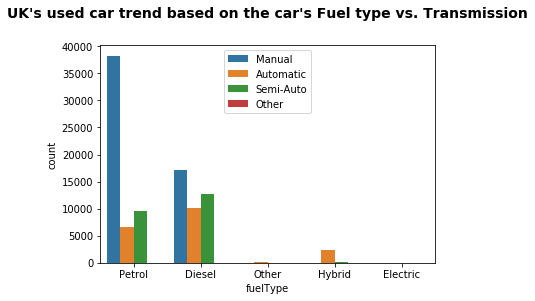

In [7]:
sns.countplot(data=used_cars_master,x='fuelType',hue='transmission')
plt.xticks(rotation=0)
plt.legend(loc="upper center")
plt.title("UK's used car trend based on the car's Fuel type vs. Transmission",y=1.1,fontsize=14,fontweight='bold');

## Relationship between UK's used cars price based fuel type and transmission
> **For petrol cars** price of manual transmission cars are less compared to other transmission type cars. Semi-automatic cars are more costlier compared to other petrol transmission type cars.
>
> **For diesel cars** price of different transmission type are more less similar to petrol cars.
>
> **For other fuel type** cars the price of automatic transmission type are more compared to manual. There are no semi-automatic and other transmission type cars in this fuel type.
>
> **For Hybrid** type cars average price of manual transmission type is more compared to automatic transmission type. But price range of automatic and semi-automatic transmission type are more compare to manual type and other transmission type.
>
>**All electric cars are automatic**

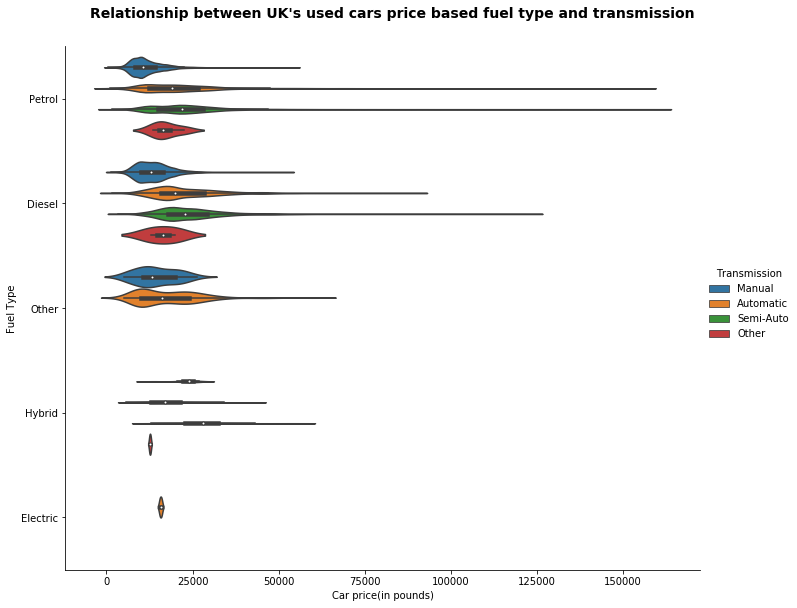

In [9]:

g = sns.catplot(data=used_cars_master, y='fuelType', x="price", hue="transmission", kind="violin",height=8,aspect=10/8);
g.set_axis_labels("Car price(in pounds)","Fuel Type")
g._legend.set_title('Transmission')
g.fig.suptitle("Relationship between UK's used cars price based fuel type and transmission", y=1.05, fontsize=14, fontweight='bold');

## UK's used cars age based on the fuel type and car brands.

> In **Petrol** cars category cars age range from 1 to 51 years. Majority of BMW cars are ranged between 3 and 4 years old. Vauxhall is the old petrol car brand listed in UK's used car market.
>
> In **Diesel** cars category cars age range from 1 to 19 years. Majority of Mercedes cars are 2 years old. Mercedes is the old Diesel car brand listed in UK's used car market.
>
> In **Hybrid** cars category cars age range from 1 to 12 years. Majority of Toyota cars are ranged between 2 and 5 years old. Toyota is the old Hybrid car brand listed in UK's used car market. Majority of the Hybrid cars are Toyota.
>
> In **Other** cars category cars age range from 1 to 13 years. Majority of volkswagon cars are 2 years old. Toyota is the old other fuel type car brand listed in UK's used car market.
>
> **All electric cars are 5 year old ford cars.**

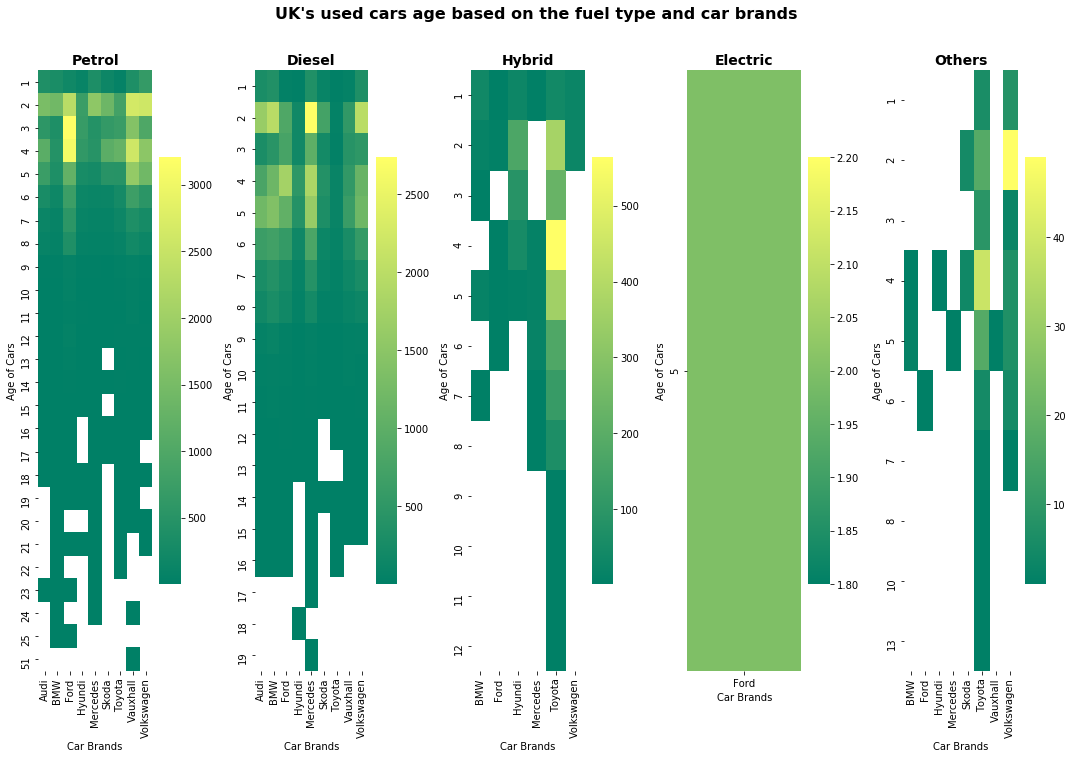

In [8]:
plt.figure(figsize=(15,10))
plt.suptitle("UK's used cars age based on the fuel type and car brands", y=1.05, fontsize=16, fontweight='bold');

plt.subplot(1,5,1)
used_cars_copy=used_cars_master.copy()
used_cars_copy['id']=used_cars_copy.index
used_cars_df = used_cars_copy.query('fuelType == "Petrol"').groupby(["CarAge", "brand"])["id"].size().reset_index()
used_cars_df = used_cars_df.pivot('CarAge','brand','id')
sns.heatmap(used_cars_df,cmap='summer')
plt.title("Petrol", y=1.015, fontsize=14, fontweight='bold')
plt.xlabel('Car Brands')
plt.ylabel('Age of Cars');

plt.subplot(1,5,2)
used_cars_copy=used_cars_master.copy()
used_cars_copy['id']=used_cars_copy.index
used_cars_df = used_cars_copy.query('fuelType == "Diesel"').groupby(["CarAge", "brand"])["id"].size().reset_index()
used_cars_df = used_cars_df.pivot('CarAge','brand','id')
sns.heatmap(used_cars_df,cmap='summer')
plt.title("Diesel", y=1.015, fontsize=14, fontweight='bold')
plt.xlabel('Car Brands')
plt.ylabel('Age of Cars');

plt.subplot(1,5,3)
used_cars_copy=used_cars_master.copy()
used_cars_copy['id']=used_cars_copy.index
used_cars_df = used_cars_copy.query('fuelType == "Hybrid"').groupby(["CarAge", "brand"])["id"].size().reset_index()
used_cars_df = used_cars_df.pivot('CarAge','brand','id')
sns.heatmap(used_cars_df,cmap='summer')
plt.title("Hybrid", y=1.015, fontsize=14, fontweight='bold')
plt.xlabel('Car Brands')
plt.ylabel('Age of Cars');

plt.subplot(1,5,4)
used_cars_copy=used_cars_master.copy()
used_cars_copy['id']=used_cars_copy.index
used_cars_df = used_cars_copy.query('fuelType == "Electric"').groupby(["CarAge", "brand"])["id"].size().reset_index()
used_cars_df = used_cars_df.pivot('CarAge','brand','id')
sns.heatmap(used_cars_df,cmap='summer')
plt.title("Electric", y=1.015, fontsize=14, fontweight='bold')
plt.xlabel('Car Brands')
plt.ylabel('Age of Cars');

plt.subplot(1,5,5)
used_cars_copy=used_cars_master.copy()
used_cars_copy['id']=used_cars_copy.index
used_cars_df = used_cars_copy.query('fuelType == "Other"').groupby(["CarAge", "brand"])["id"].size().reset_index()
used_cars_df = used_cars_df.pivot('CarAge','brand','id')
sns.heatmap(used_cars_df,cmap='summer')
plt.title("Others", y=1.015, fontsize=14, fontweight='bold')
plt.xlabel('Car Brands')
plt.ylabel('Age of Cars');
plt.tight_layout()